# Trabalho de Ciência dos Dados


** Nome:** Abel Cavalcante de Andrade Neto

## Introdução

Visando compreender a intera *Como o nível de fertilidade e a porcentagem de idosos se relacionam com o IDH de um país?*

## Importações

Aqui, importamos as bibliotecas necessárias para a análise:

In [113]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

idh = pd.read_excel('Indicator_HDI.xlsx')
fertility = pd.read_excel('indicator undata total_fertility.xlsx')
seniors = pd.read_excel('population_aged_60plus_years_both_sexes_percent.xlsx')

## Filtrando o Ano

Devido à limitações dos próprios dados, o ano escolhido foi o de 2005:

In [114]:
idh_5 = idh.loc[:, ["HDI", 2005]]
fert_5 = fertility.loc[:, ["Total fertility rate", 2005]]
seni_5 = seniors.loc[:, ["geo", 2005]]

## Conversão de Índice

Aqui, definimos o que servirá como índice em cada uma das tabelas:

In [115]:
idh_index = idh_5.set_index('HDI')
fert_index = fert_5.set_index('Total fertility rate')
seni_index = seni_5.set_index('geo')

## Remoção dos Países sem dados

Removemos, por meio do comando *.dropna()*, os países que não possuem dados:

In [116]:
idh_nan = idh_index.dropna()
fert_nan = fert_index.dropna()
seni_nan = seni_index.dropna()

## Junção

Assim, juntamos todos os dados em uma única tabela:

In [117]:
idh_fert = idh_nan.join(fert_nan, how="inner", lsuffix="_IDH", rsuffix="_Fertility")
everything = idh_fert.join(seni_nan, how="inner")
everything.columns = ['2005_IDH', '2005_Fertility Rate (%)', '2005_Amount of Elderly (%)']

everything.head()

,2005_IDH,2005_Fertility Rate (%),2005_Amount of Elderly (%)
Afghanistan,0.340,6.93,3.62
Albania,0.721,1.92,12.30
Algeria,0.667,2.51,7.04
Angola,0.445,6.66,3.71
Argentina,0.765,2.29,13.80


E ordenamos baseando-se no IDH:

In [118]:
order_idh = everything.sort_values('2005_IDH')

order_idh.head()

,2005_IDH,2005_Fertility Rate (%),2005_Amount of Elderly (%)
"Congo, Dem. Rep.",0.260,6.73,4.73
Niger,0.265,7.62,4.06
Burundi,0.267,6.73,4.21
Mozambique,0.285,5.67,4.83
Liberia,0.300,5.46,4.90


## Gráficos

Assim, podemos relacionar O IDH tanto com a porcentagem de idosos quanto com a Taxa de fertilidade de um país, com suas respectivas retas de tendência

In [119]:
def reta(dados_x, dados_y):    
    a = dados_y.cov(dados_x) / dados_x.var()
    b = dados_y.mean() - a*dados_x.mean()
 
    print('Ajuste linear entre X3 e X4:')
    print('Coeficiente linear:', b)
    print('Coeficiente angular:', a)
 
    fig = plt.figure(figsize=(8, 6))
    plt.scatter(dados_x, dados_y, c='red', alpha=0.8)
    plt.title('x versus y')
    plt.xlabel('eixo x')
    plt.ylabel('eixo y')
 
    plt.plot((dados_x.min(), dados_x.max()), (a*dados_x.min()+b, a*dados_x.max()+b), color='blue')
 
    plt.tight_layout()
    plt.show()

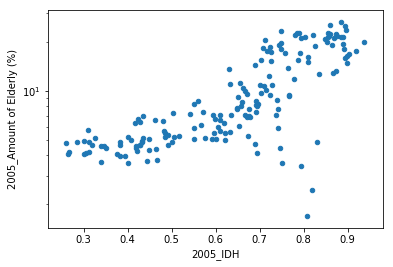

In [120]:
order_idh.plot.scatter(x='2005_IDH',y='2005_Amount of Elderly (%)', logy=True)

Ajuste linear entre X3 e X4:
Coeficiente linear: -6.76333389305708
Coeficiente angular: 26.724546035656715


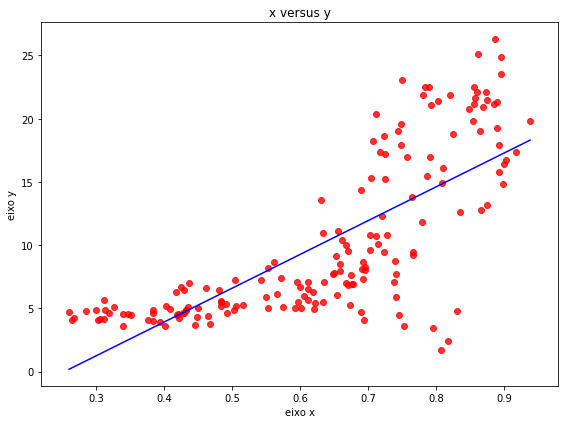

In [121]:
reta(order_idh['2005_IDH'], order_idh['2005_Amount of Elderly (%)'])

E fazemos a correlação

In [134]:
order_idh['2005_IDH'].corr(order_idh['2005_Amount of Elderly (%)'])

0.7483393477685291

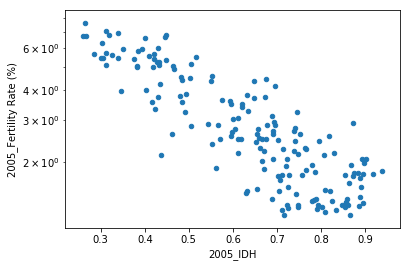

In [123]:
order_idh.plot.scatter(x='2005_IDH',y='2005_Fertility Rate (%)', logy=True);

Ajuste linear entre X3 e X4:
Coeficiente linear: 8.112727128619099
Coeficiente angular: -7.90895983867094


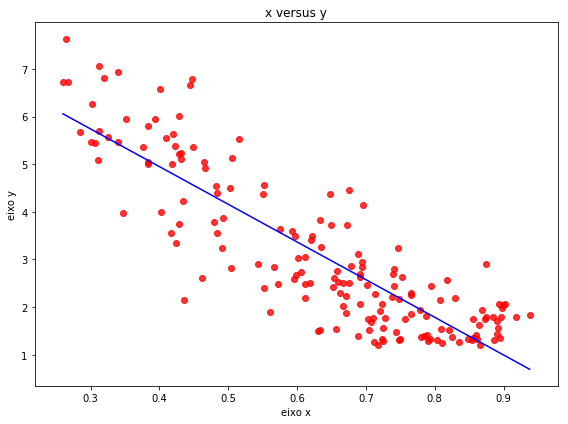

In [127]:
reta(order_idh['2005_IDH'], order_idh['2005_Fertility Rate (%)'])

In [124]:
order_idh['2005_IDH'].corr(order_idh['2005_Fertility Rate (%)'])

-0.8634699642595323

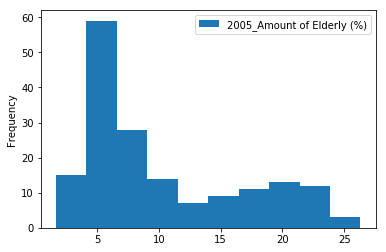

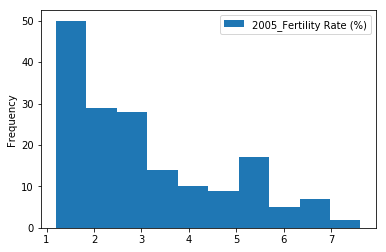

In [128]:
order_idh.plot.hist(x='2005_IDH',y='2005_Amount of Elderly (%)') and order_idh.plot.hist(x='2005_IDH',y='2005_Fertility Rate (%)');